In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2 as cv

import downloader as d 
import video as v

from typing import Tuple, Union
from numpy.typing import NDArray
from dataclasses import dataclass
from collections import deque

from importlib import reload

In [3]:
def get_video(path: str) -> Tuple[NDArray, int]:
    vid = cv.VideoCapture(path)
    fps = vid.get(cv.CAP_PROP_FPS)
    #video = np.fromiter(vid, np.ndarray)
    frames = []
    ret = True
    while ret:
        ret, img = vid.read() # read one frame from the 'capture' object; img is (H, W, C)
        if ret:
            img = cv.resize(src=img, dsize=(100,100))
            img = cv.cvtColor(img, cv.COLOR_BGR2HLS)
            frames.append(img)
    # dimensions (T, H, W, C)
    return np.stack(frames, axis=0), int(round(fps))

def get_vid_df(path: str) -> pd.DataFrame:
    vid,fps = get_video(path)
    frames = vid.shape[0]
    height = vid.shape[1]
    width = vid.shape[2]
    df = pd.DataFrame(vid.reshape((-1,3)))
    df['frame'] = df.index // (width * height)
    df['x'] = df.index % width
    df['y'] = df.index // width % height
    df['second'] = df.frame // fps
    df = df.set_index(['frame','y','x']).rename(columns={
        0:'hue',
        1:'lightness',
        2:'saturation',
    })
    df.attrs['fps'] = fps
    df.attrs['height'] = height
    df.attrs['width'] = width
    return df

In [4]:
path = 'videos/Banned Pokemon Seizure Scene.mp4'

In [5]:
df = v.get_vid_df(path)
df_hls = get_vid_df(path)

In [6]:
(df.saturation != df_hls.saturation).sum()

7746244

In [7]:
fps = df.attrs['fps']

/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_49348/4056795954.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks() // fps)
/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_49348/4056795954.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks() // fps)


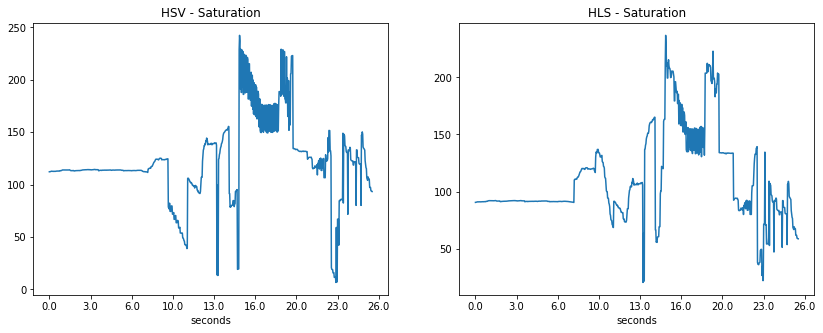

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(121)
ax1 = df.groupby('frame').saturation.mean().plot()
plt.title('HSV - Saturation')
ax1.set_xticklabels(ax1.get_xticks() // fps)
ax1.set_xlabel('seconds')
plt.subplot(122)
ax2 = df_hls.groupby('frame').saturation.mean().plot()
plt.title('HLS - Saturation')
ax2.set_xticklabels(ax2.get_xticks() // fps)
ax2.set_xlabel('seconds')
plt.show()

/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_49348/669501717.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks() // fps)
/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_49348/669501717.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks() // fps)


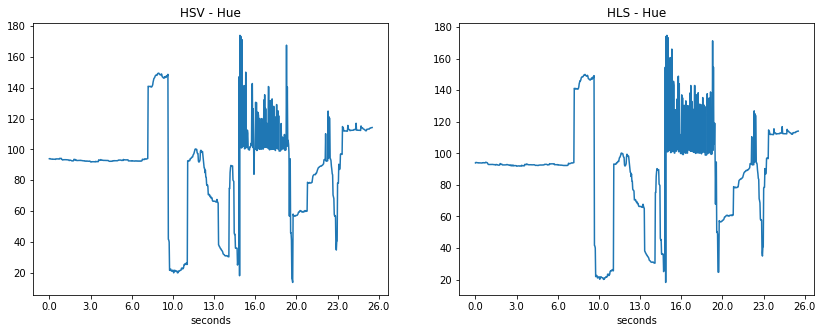

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
ax1 = df.groupby('frame').hue.mean().plot()
plt.title('HSV - Hue')
ax1.set_xticklabels(ax1.get_xticks() // fps)
ax1.set_xlabel('seconds')
plt.subplot(122)
ax2 = df_hls.groupby('frame').hue.mean().plot()
plt.title('HLS - Hue')
ax2.set_xticklabels(ax2.get_xticks() // fps)
ax2.set_xlabel('seconds')
plt.show()

/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_49348/3679956698.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticks() // fps)
/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_49348/3679956698.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticks() // fps)


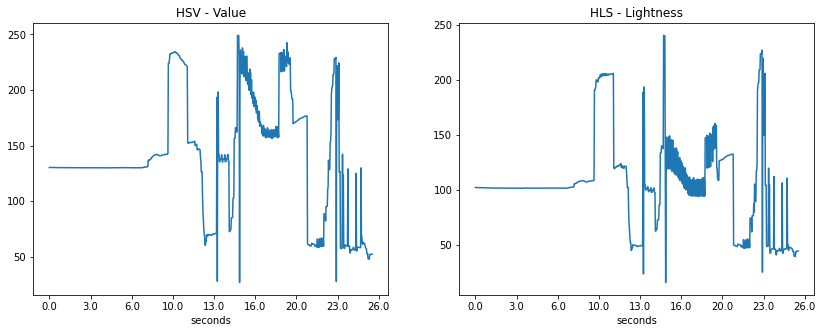

In [12]:
plt.figure(figsize=(14,5))
plt.subplot(121)
ax1 = df.groupby('frame').value.mean().plot()
plt.title('HSV - Value')
ax1.set_xticklabels(ax1.get_xticks() // fps)
ax1.set_xlabel('seconds')
plt.subplot(122)
ax2 = df_hls.groupby('frame').lightness.mean().plot()
plt.title('HLS - Lightness')
ax2.set_xticklabels(ax2.get_xticks() // fps)
ax2.set_xlabel('seconds')
plt.show()

In [14]:
# lightness series
ls = df_hls.groupby('frame').lightness.mean()
# value series
vs = df.groupby('frame').value.mean()
# hue hls
hue_hls = df_hls.groupby('frame').hue.mean()
# hue hsv
hue_hsv = df.groupby('frame').hue.mean()
# saturtion hls
sat_hls = df_hls.groupby('frame').saturation.mean()
# saturation hsv
sat_hsv = df.groupby('frame').saturation.mean()

# concatanate
cdf = pd.concat([ls, vs, hue_hls, hue_hsv, sat_hls, sat_hsv], axis=1)


In [16]:
cdf.columns = ['lightness', 'value', 'hue_hls', 'hue_hsv', 'sat_hls', 'sat_hsv']

In [17]:
cdf.head()

,lightness,value,hue_hls,hue_hsv,sat_hls,sat_hsv
frame,,,,,,
0,101.8951,130.2877,93.9376,93.9361,90.4799,112.2180
1,101.8895,130.2931,94.2434,94.0466,90.5812,112.3405
2,101.8651,130.2800,94.1917,93.9874,90.6396,112.3902
3,101.8367,130.2517,94.0980,93.7863,90.6868,112.4131
4,101.8017,130.2537,94.0516,93.7422,90.9130,112.6325


In [21]:
cdf = cdf.assign(
    light_diff = lambda x: x.lightness.shift(1) - x.lightness,
    value_diff = lambda x: x.value.shift(1) - x.value,
    hue_hls_diff = lambda x: x.hue_hls.shift(1) - x.hue_hls,
    hue_hsv_diff = lambda x: x.hue_hsv.shift(1) - x.hue_hsv,
    sat_hls_diff = lambda x: x.sat_hls.shift(1) - x.sat_hls,
    sat_hsv_diff =lambda x: x.sat_hsv.shift(1) - x.sat_hsv
)

In [22]:
cdf.head()

,lightness,value,hue_hls,hue_hsv,sat_hls,sat_hsv,light_diff,value_diff,hue_hls_diff,hue_hsv_diff,sat_hls_diff,sat_hsv_diff
frame,,,,,,,,,,,,
0,101.8951,130.2877,93.9376,93.9361,90.4799,112.2180,NaN,NaN,NaN,NaN,NaN,NaN
1,101.8895,130.2931,94.2434,94.0466,90.5812,112.3405,0.0056,-0.0054,-0.3058,-0.1105,-0.1013,-0.1225
2,101.8651,130.2800,94.1917,93.9874,90.6396,112.3902,0.0244,0.0131,0.0517,0.0592,-0.0584,-0.0497
3,101.8367,130.2517,94.0980,93.7863,90.6868,112.4131,0.0284,0.0283,0.0937,0.2011,-0.0472,-0.0229
4,101.8017,130.2537,94.0516,93.7422,90.9130,112.6325,0.0350,-0.0020,0.0464,0.0441,-0.2262,-0.2194


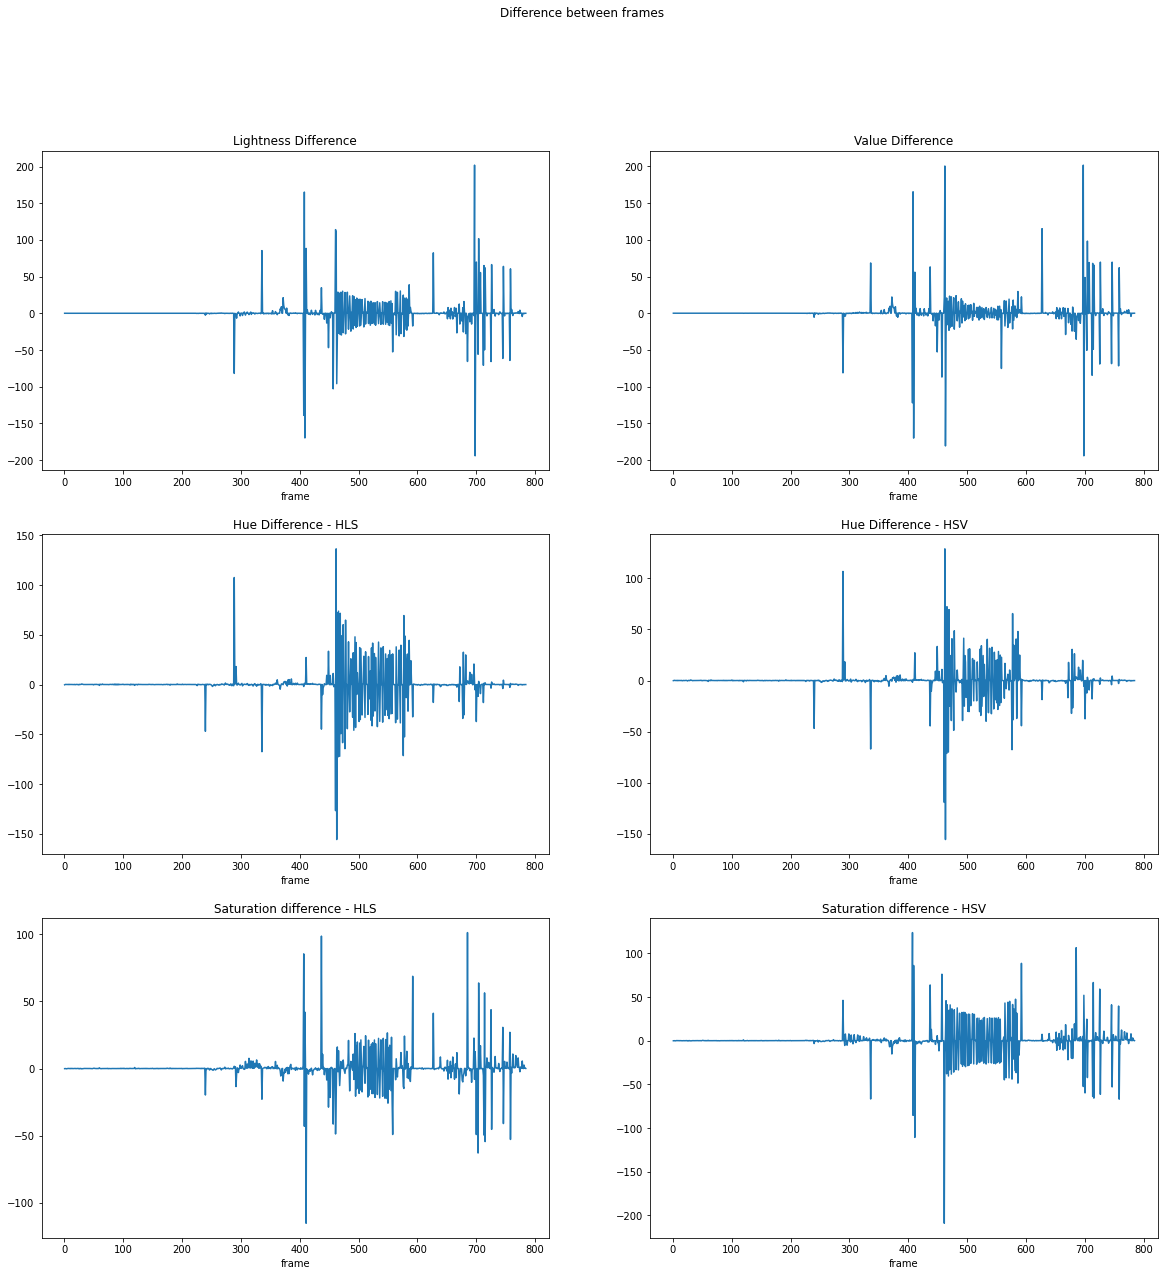

In [25]:
plt.figure(figsize=(20,20))
plt.suptitle('Difference between frames')
plt.subplot(321)
cdf.light_diff.plot()
plt.title('Lightness Difference')

plt.subplot(322)
cdf.value_diff.plot()
plt.title('Value Difference')

plt.subplot(323)
cdf.hue_hls_diff.plot()
plt.title('Hue Difference - HLS')

plt.subplot(324)
cdf.hue_hsv_diff.plot()
plt.title('Hue Difference - HSV')

plt.subplot(325)
cdf.sat_hls_diff.plot()
plt.title('Saturation difference - HLS')

plt.subplot(326)
cdf.sat_hsv_diff.plot()
plt.title('Saturation difference - HSV')

plt.show()

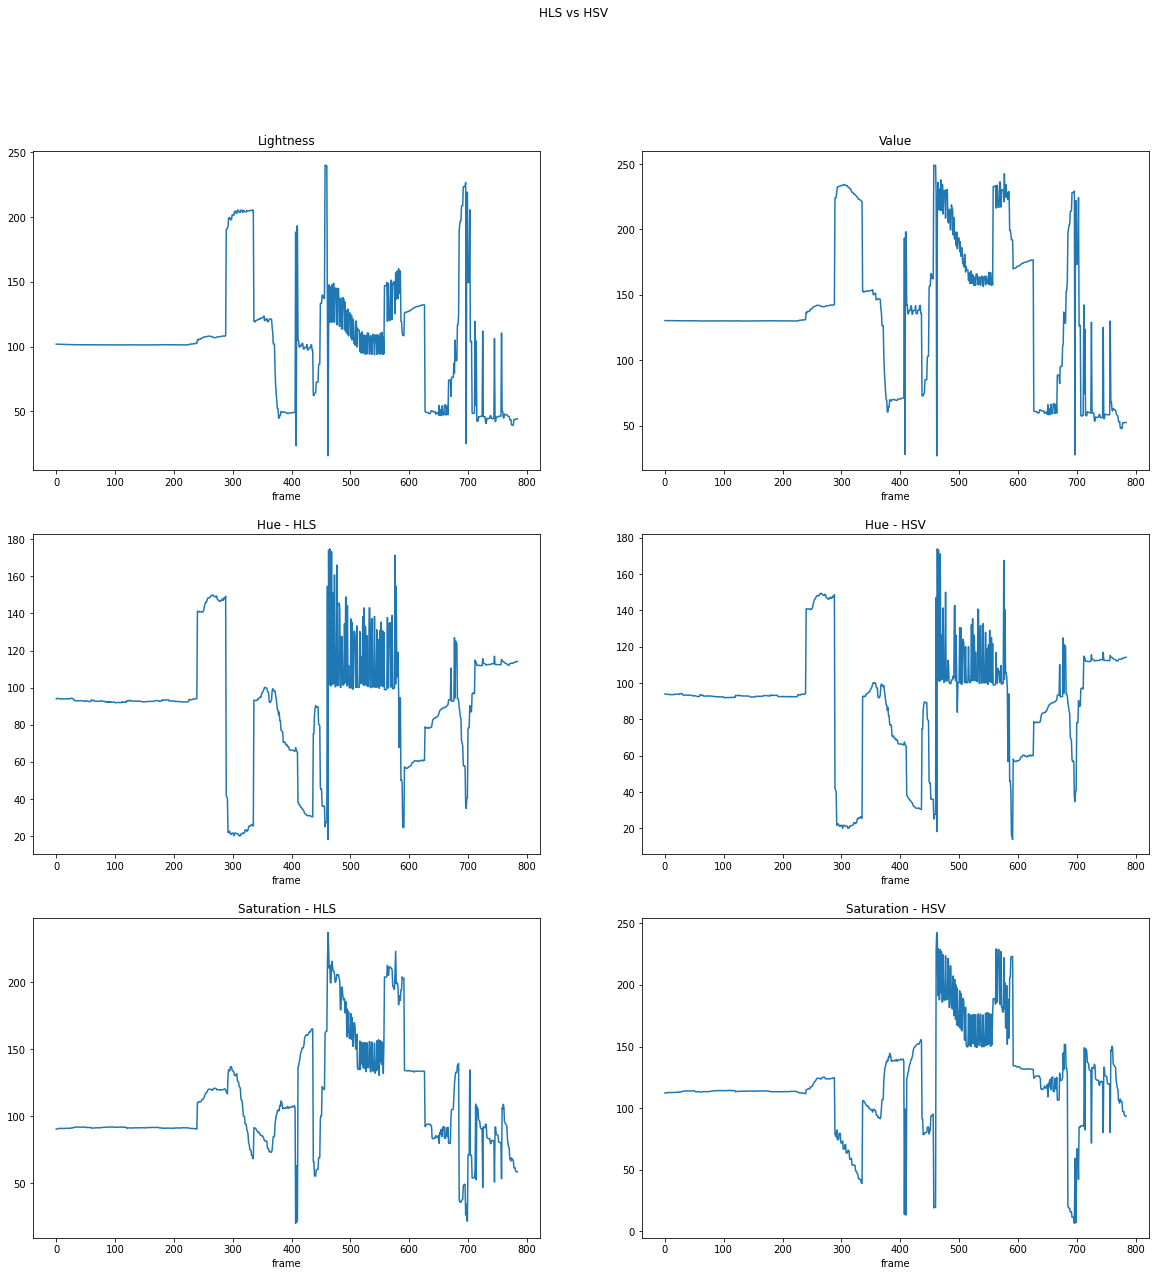

In [26]:
plt.figure(figsize=(20,20))
plt.suptitle('HLS vs HSV')
plt.subplot(321)
cdf.lightness.plot()
plt.title('Lightness')

plt.subplot(322)
cdf.value.plot()
plt.title('Value')

plt.subplot(323)
cdf.hue_hls.plot()
plt.title('Hue - HLS')

plt.subplot(324)
cdf.hue_hsv.plot()
plt.title('Hue - HSV')

plt.subplot(325)
cdf.sat_hls.plot()
plt.title('Saturation - HLS')

plt.subplot(326)
cdf.sat_hsv.plot()
plt.title('Saturation - HSV')

plt.show()